# Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [112]:
company=pd.read_csv('Company_Data (1).csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [113]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [114]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# convert categorical to numeric data

In [116]:
company['ShelveLoc']=pd.Categorical(company['ShelveLoc'])
company['ShelveLoc']=company['ShelveLoc'].cat.codes

In [117]:
company['Urban']=pd.Categorical(company['Urban'])
company['Urban']=company['Urban'].cat.codes

In [118]:
company['US']=pd.Categorical(company['US'])
company['US']=company['US'].cat.codes

In [119]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [120]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<Axes: >

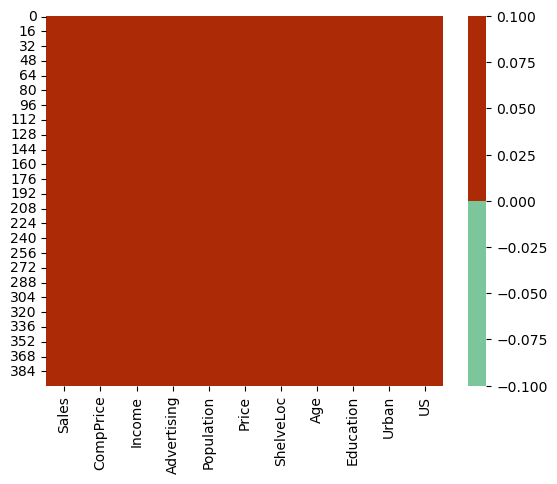

In [121]:
color=['#7BC69B','#AD2A07']
pal=sns.color_palette(color)
sns.heatmap(company.isnull(),cmap=pal)

In [122]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


<Axes: >

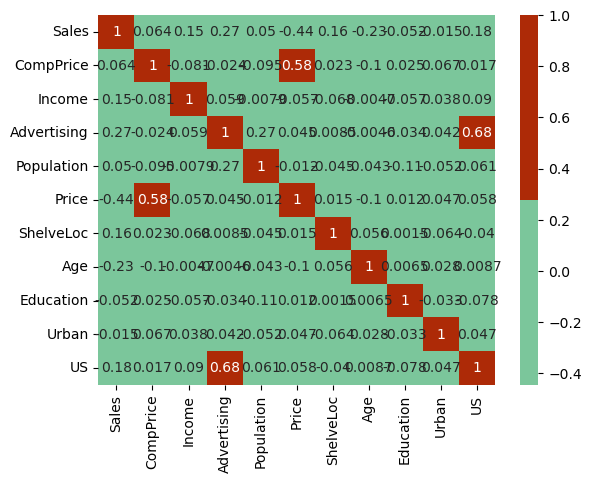

In [123]:
color=['#7BC69B','#AD2A07']
pal=sns.color_palette(color)
sns.heatmap(company.corr(),cmap=pal,annot=True)

In [124]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [125]:
company.shape

(400, 11)

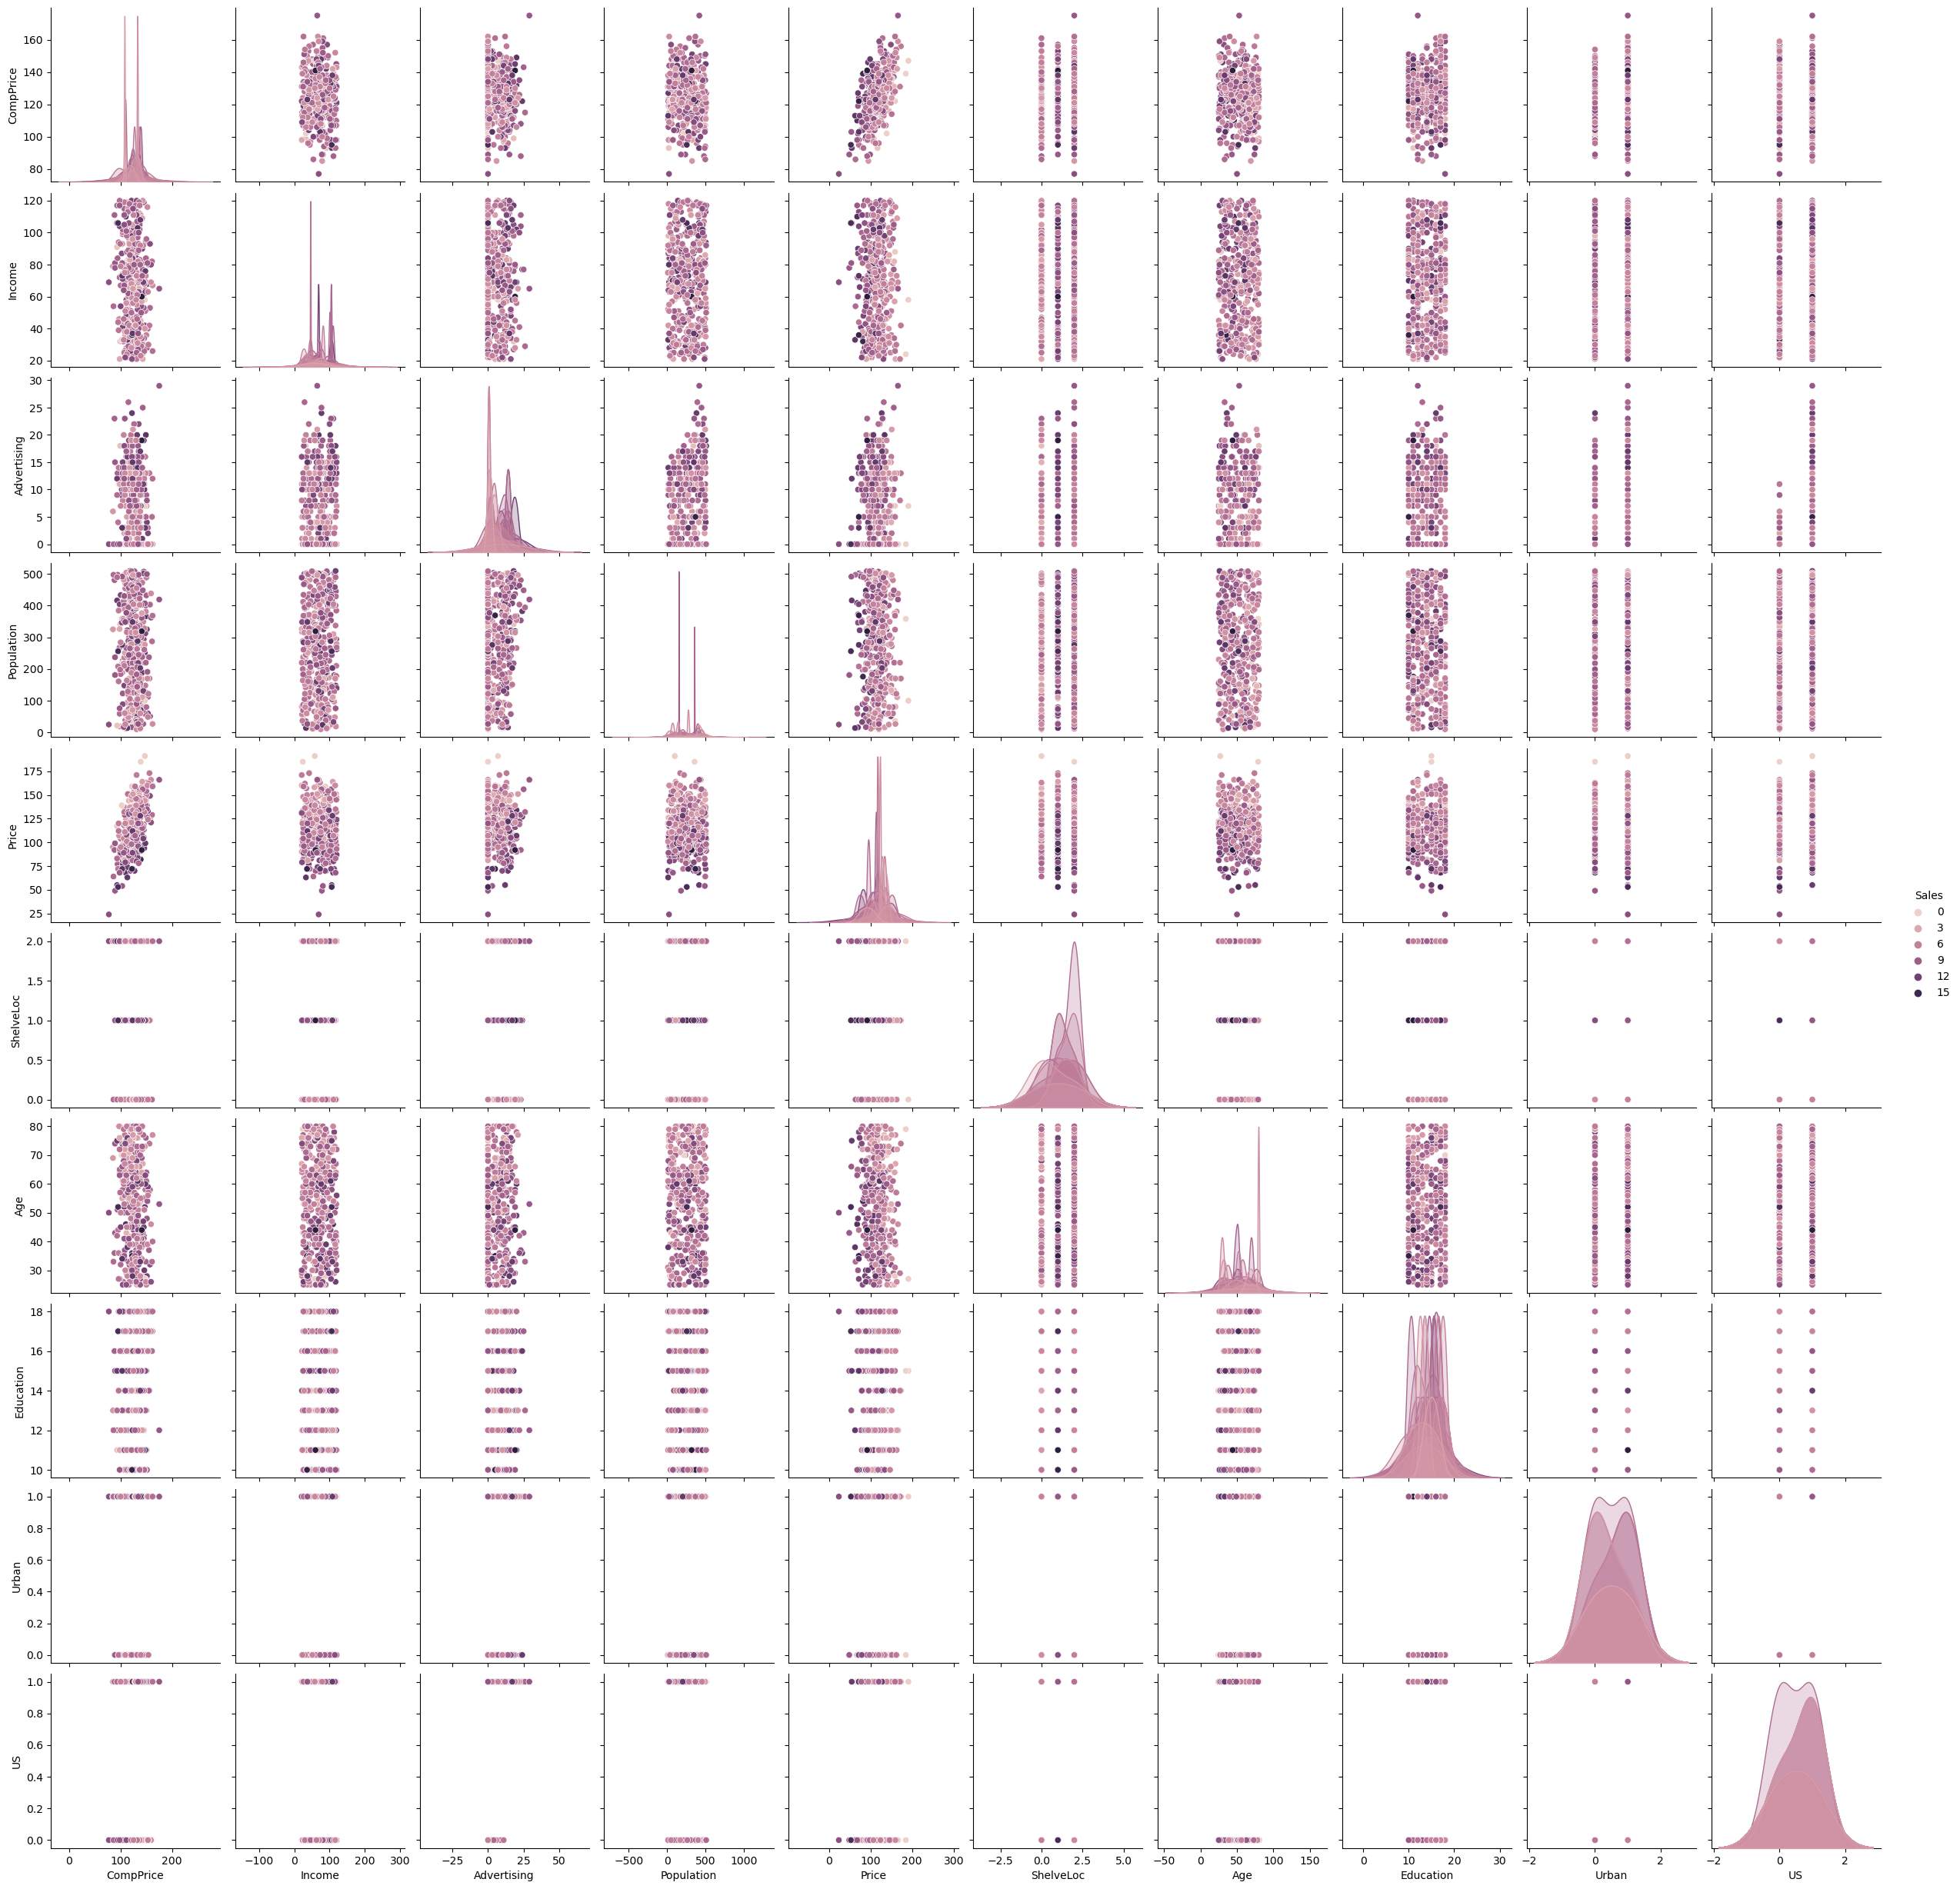

In [126]:
sns.pairplot(data=company,hue='Sales')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'CompPrice'),
  Text(2, 0, 'Income'),
  Text(3, 0, 'Advertising'),
  Text(4, 0, 'Population'),
  Text(5, 0, 'Price'),
  Text(6, 0, 'ShelveLoc'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Education'),
  Text(9, 0, 'Urban'),
  Text(10, 0, 'US')])

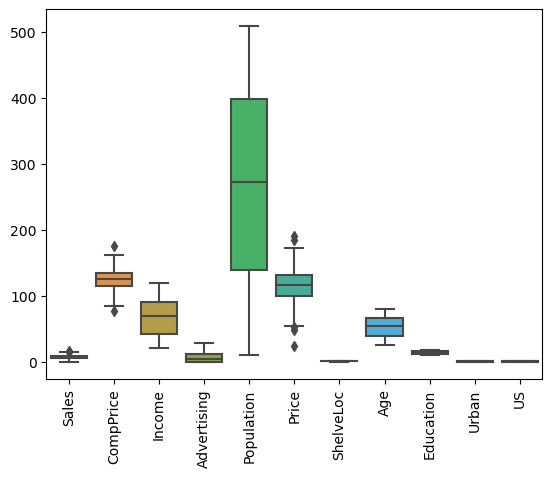

In [127]:
sns.boxplot(data=company)
plt.xticks(rotation=90)

In [128]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [129]:
X=company.iloc[:,1:11]
y=company.iloc[:,0]

In [130]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [131]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

# split the data into train and test dataset

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

# build the Random forest model

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
rf_model=RandomForestRegressor(n_estimators=50,max_features=5,max_depth=8,max_leaf_nodes=10,random_state=42,)

In [156]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=5, max_leaf_nodes=10,
                      n_estimators=50, random_state=42)

# predict and get metrics for the training data

In [158]:
from sklearn.metrics import mean_squared_error
import math

In [159]:
train_pred=rf_model.predict(X_train)

In [160]:
train_mse=mean_squared_error(y_train,train_pred)

In [161]:
train_rmse=math.sqrt(train_mse)

In [162]:
train_mse,train_rmse

(2.564840113022376, 1.6015118210685728)

# predict and get metrics for the testing data

In [164]:
test_pred=rf_model.predict(X_test)

In [165]:
test_mse=mean_squared_error(y_test,test_pred)

In [166]:
test_rmse=math.sqrt(test_mse)

In [167]:
test_mse,test_rmse

(4.867443592626455, 2.206228363661943)

# plot the regression tree

In [169]:
from sklearn.tree import plot_tree

In [170]:
fnames=company.columns
fnames

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [171]:
cname=company['Sales'].unique()
cname

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

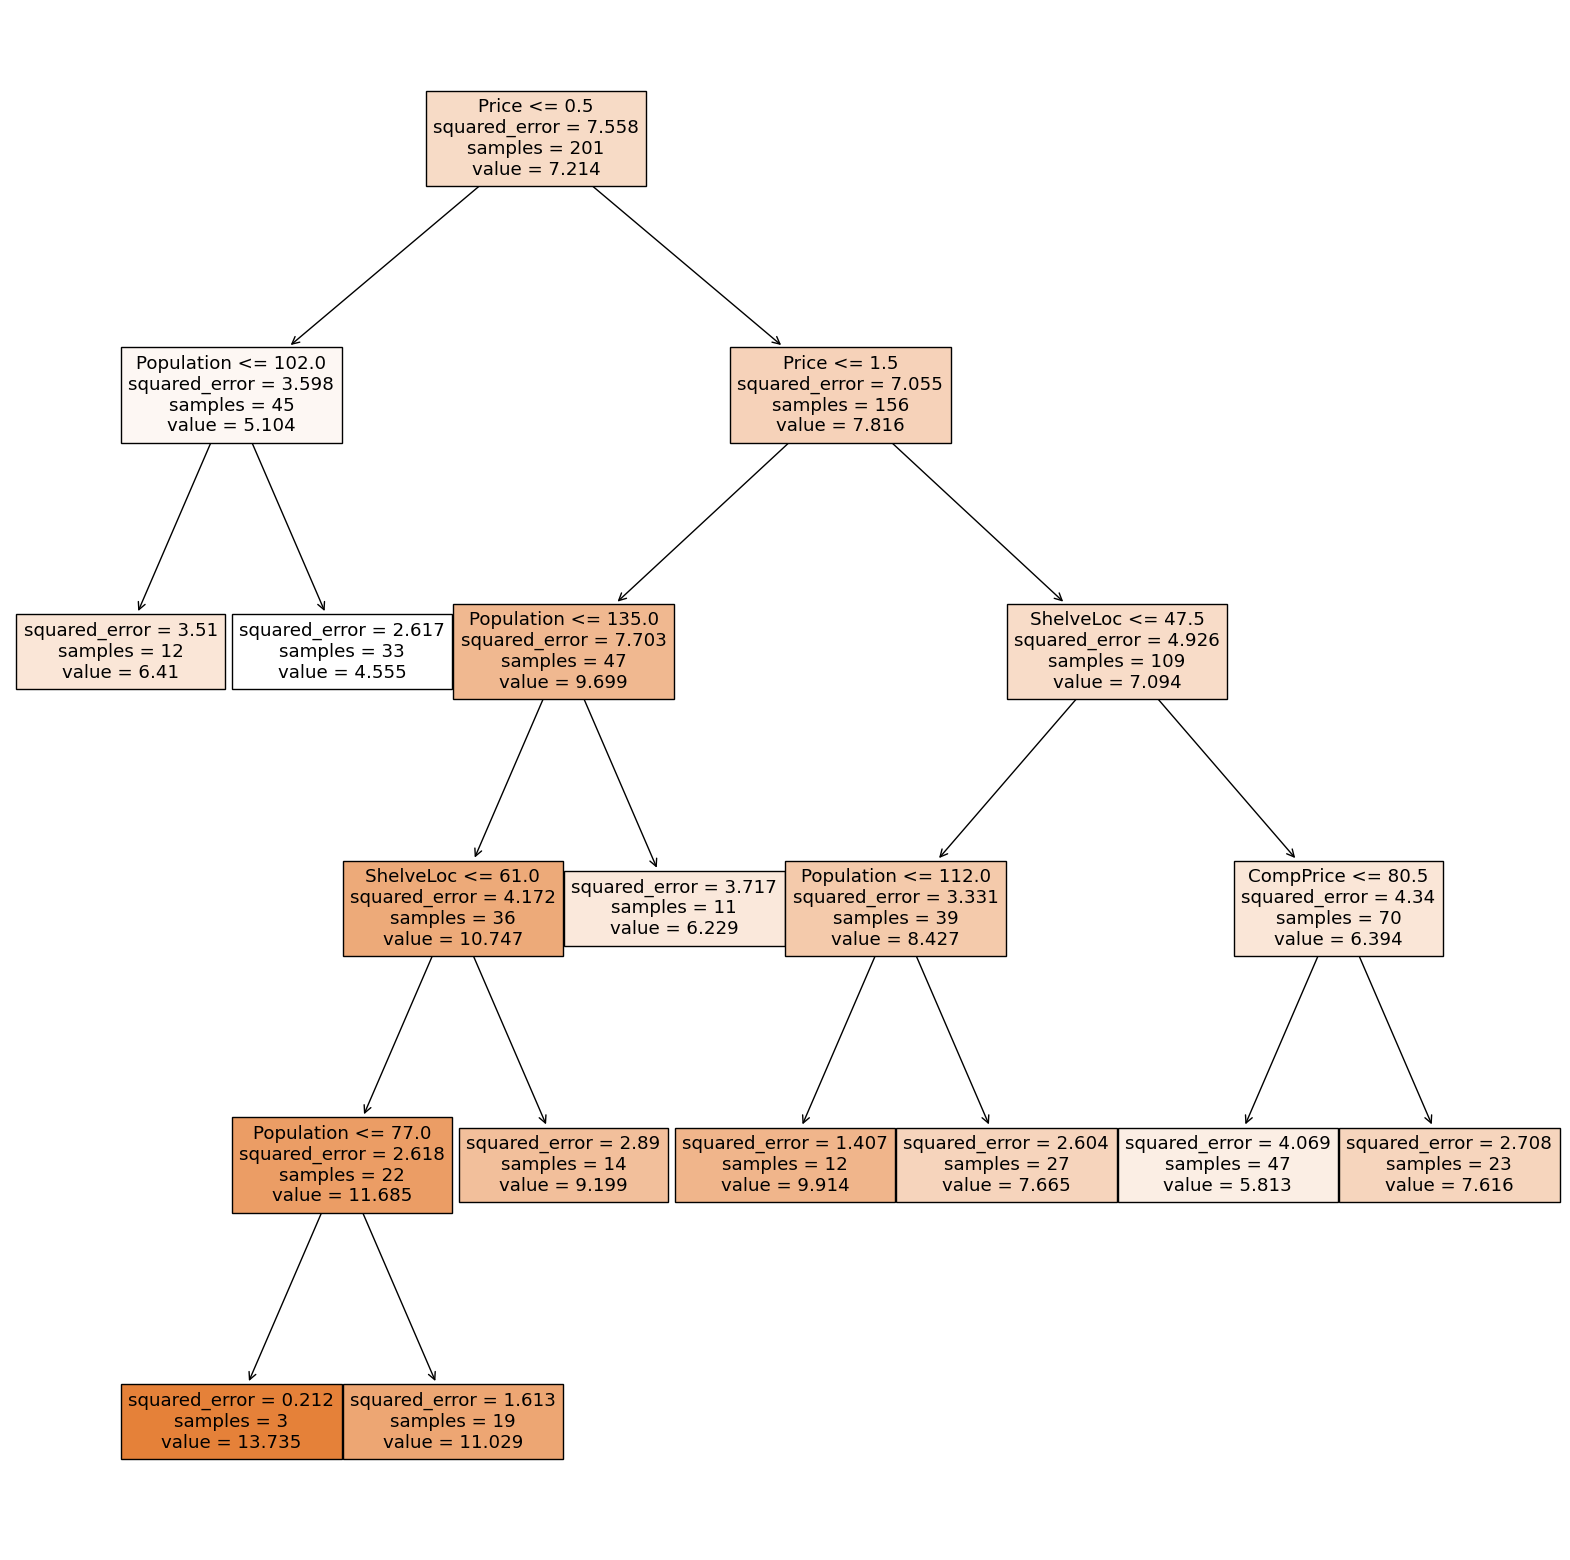

In [172]:
plt.figure(figsize=(20,20))
decision_tree = rf_model.estimators_[0]
plot_tree(decision_tree,feature_names=fnames.tolist(),class_names=cname.tolist(),filled=True)
plt.show()

# predict New data using Random forest

In [174]:
new_data=pd.DataFrame({'CompPrice':200,'Income':26,'Advertising':8,'Population':450,'Price':170,'ShelveLoc':2,'Age':53,'Education':13,'Urban':1,'US':0},index=[1])
new_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,200,26,8,450,170,2,53,13,1,0


In [175]:
rf_model.predict(new_data)

array([6.67528626])

# visualize the company data

In [177]:
from sklearn.manifold import TSNE

In [178]:
vmodel=TSNE(n_components=2)

In [179]:
ts_comps=vmodel.fit_transform(X)

In [180]:
ts_comps

array([[-6.51103377e-01, -1.17122531e+00],
       [ 3.09044099e+00,  1.85145926e+00],
       [ 2.84281588e+00,  2.61595559e+00],
       [-2.96155090e+01,  3.59687734e+00],
       [-9.59047794e+00, -2.02990294e-01],
       [-3.36462288e+01,  3.94782805e+00],
       [ 4.21253357e+01,  1.45892099e-01],
       [-2.45904236e+01,  2.14047804e-01],
       [ 2.76731358e+01,  3.92045999e+00],
       [ 2.63614292e+01,  4.15663576e+00],
       [ 2.01180687e+01,  9.37677979e-01],
       [-3.31918488e+01,  2.52350020e+00],
       [-1.89939938e+01, -3.68673515e+00],
       [ 3.66789665e+01, -2.57447839e-01],
       [ 2.31700077e+01,  4.56783915e+00],
       [-2.43629761e+01, -8.57663870e-01],
       [-2.09359340e-02,  3.22991300e+00],
       [ 6.41468716e+00, -1.55719435e+00],
       [-2.10658646e+01,  4.65259266e+00],
       [ 3.76577187e+01, -1.55277288e+00],
       [-1.51426306e+01,  3.82690877e-01],
       [ 8.27094555e+00,  1.97316456e+00],
       [-3.60862198e+01, -1.60632718e+00],
       [ 1.

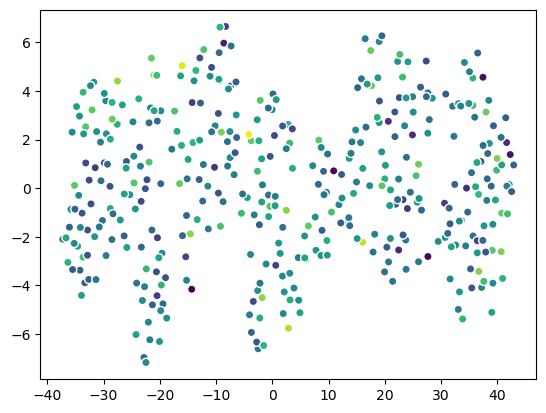

In [181]:
plt.scatter(ts_comps[:,0],ts_comps[:,1] ,c=y,cmap='viridis',edgecolors='white')
plt.show()

# ********************************************************************************************************************************

# Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [2]:
fraud=pd.read_csv('Fraud_check (1).csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud['Risk']=fraud['Taxable.Income'].apply(lambda x:'Risky' if x<=30000 else 'Good')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [4]:
fraud.drop('Taxable.Income',axis=1, inplace=True)

In [5]:
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Risk
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [6]:
fraud.rename(columns={'Marital.Status':'Marital_Status','City.Population':'City_Population','Work.Experience':'Work_Experience'},inplace=True)
fraud

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [7]:
fraud['Undergrad']=pd.Categorical(fraud['Undergrad'])
fraud['Undergrad']=fraud['Undergrad'].cat.codes

In [8]:
fraud['Marital_Status']=pd.Categorical(fraud['Marital_Status'])
fraud['Marital_Status']=fraud['Marital_Status'].cat.codes

In [9]:
fraud['Urban']=pd.Categorical(fraud['Urban'])
fraud['Urban']=fraud['Urban'].cat.codes

In [10]:
fraud['Risk']=pd.Categorical(fraud['Risk'])
fraud['Risk']=fraud['Risk'].cat.codes

In [11]:
fraud

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [12]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int8 
 1   Marital_Status   600 non-null    int8 
 2   City_Population  600 non-null    int64
 3   Work_Experience  600 non-null    int64
 4   Urban            600 non-null    int8 
 5   Risk             600 non-null    int8 
dtypes: int64(2), int8(4)
memory usage: 11.8 KB


In [13]:
fraud.isnull().sum()

Undergrad          0
Marital_Status     0
City_Population    0
Work_Experience    0
Urban              0
Risk               0
dtype: int64

<Axes: >

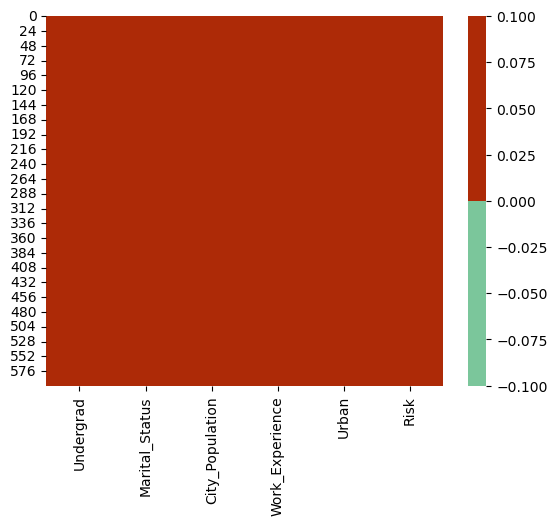

In [14]:
color=['#7BC69B','#AD2A07']
pal=sns.color_palette(color)
sns.heatmap(fraud.isnull(),cmap=pal)

In [15]:
fraud.corr()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital_Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City_Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work_Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
Risk,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


<Axes: >

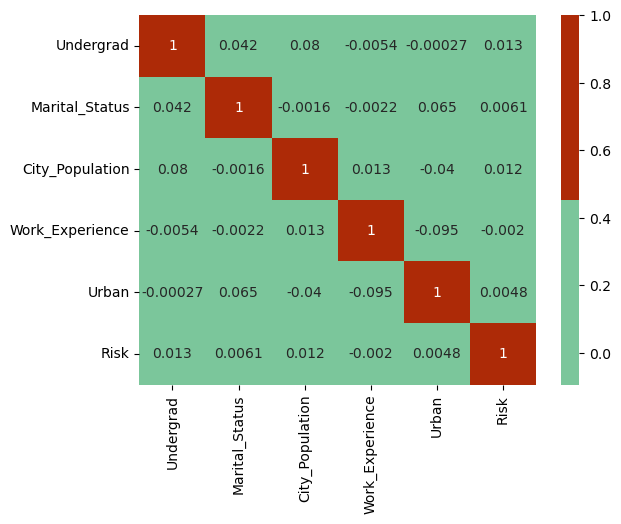

In [16]:
color=['#7BC69B','#AD2A07']
pal=sns.color_palette(color)
sns.heatmap(fraud.corr(),cmap=pal,annot=True)

In [17]:
fraud[fraud.duplicated()]

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk


In [18]:
fraud

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [19]:
X1=fraud.iloc[:,:5]
y1=fraud.iloc[:,5]

In [20]:
X1

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [21]:
y1

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Risk, Length: 600, dtype: int8

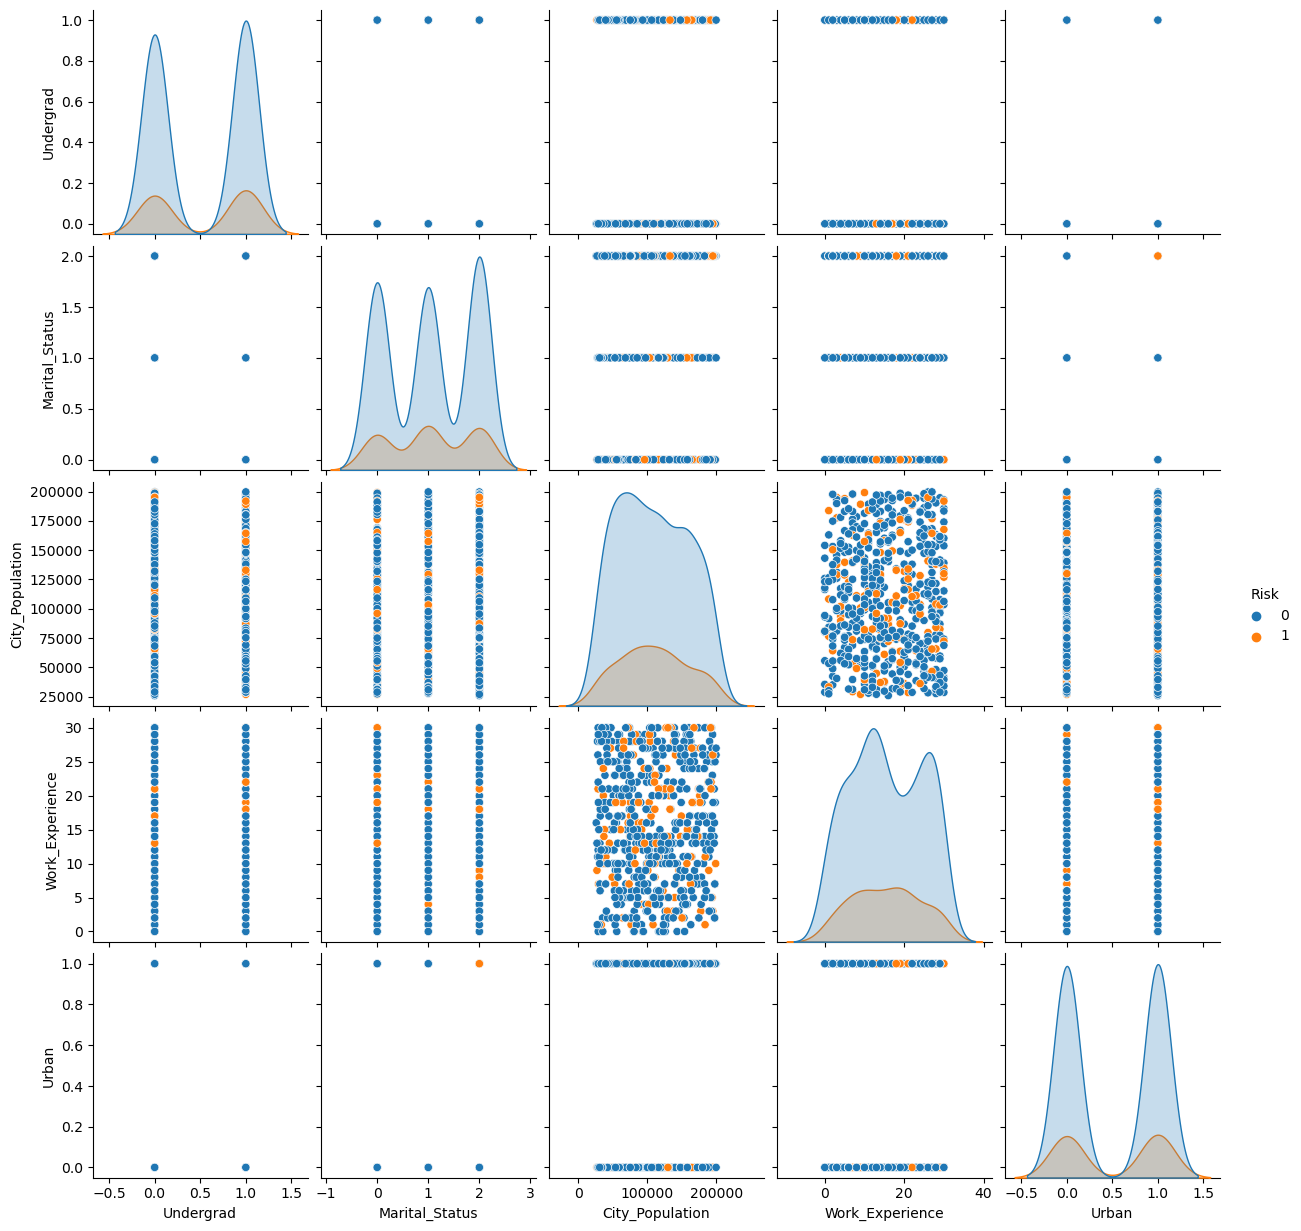

In [22]:
sns.pairplot(data=fraud,hue='Risk')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Undergrad'),
  Text(1, 0, 'Marital_Status'),
  Text(2, 0, 'City_Population'),
  Text(3, 0, 'Work_Experience'),
  Text(4, 0, 'Urban'),
  Text(5, 0, 'Risk')])

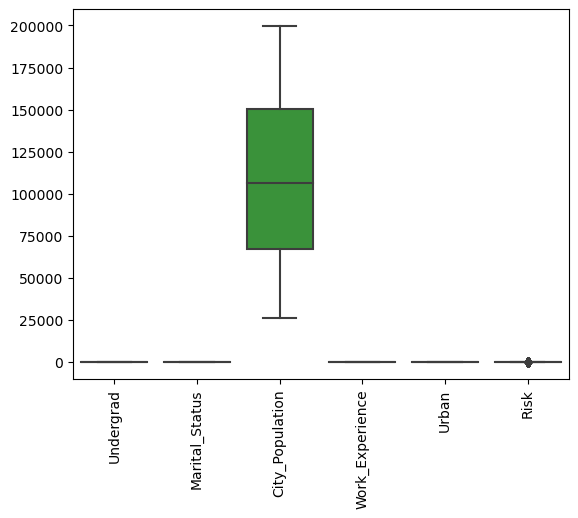

In [23]:
sns.boxplot(data=fraud)
plt.xticks(rotation=90)

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
smote=SMOTE(sampling_strategy='auto')

In [26]:
X1,y1=smote.fit_resample(X1,y1)

# split train and test data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42)
X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape

((761, 5), (191, 5), (761,), (191,))

# build the random forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc_model=RandomForestClassifier(n_estimators=40,max_depth=8,max_leaf_nodes=10, max_features=3,random_state=42)

In [79]:
rfc_model.fit(X1_train,y1_train)

RandomForestClassifier(max_depth=8, max_features=3, max_leaf_nodes=10,
                       n_estimators=40, random_state=42)

# predict for training data and calculate the metrics

In [81]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [82]:
rfctrain_pred=rfc_model.predict(X1_train)

In [83]:
confusion_matrix(y1_train,rfctrain_pred)

array([[288,  93],
       [113, 267]], dtype=int64)

In [84]:
print(classification_report(y1_train,rfctrain_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       381
           1       0.74      0.70      0.72       380

    accuracy                           0.73       761
   macro avg       0.73      0.73      0.73       761
weighted avg       0.73      0.73      0.73       761



# roc auc curve for training data

In [86]:
#the output probabilities
train_proba=rfc_model.predict_proba(X1_train)
train_proba

array([[0.42928869, 0.57071131],
       [0.44855769, 0.55144231],
       [0.31688687, 0.68311313],
       ...,
       [0.56216079, 0.43783921],
       [0.56290296, 0.43709704],
       [0.43509294, 0.56490706]])

In [87]:
train_proba[:,1]

array([0.57071131, 0.55144231, 0.68311313, 0.3727522 , 0.5475911 ,
       0.68311313, 0.74555799, 0.4641822 , 0.47700557, 0.38696071,
       0.74616537, 0.69225471, 0.29380916, 0.38287647, 0.47431287,
       0.25153357, 0.75684246, 0.36803814, 0.44166499, 0.69849275,
       0.32653949, 0.69426242, 0.54718789, 0.70539097, 0.37892821,
       0.54267867, 0.74555799, 0.76201203, 0.55216007, 0.75695852,
       0.75684246, 0.2722469 , 0.74773247, 0.3626362 , 0.35267578,
       0.4805246 , 0.62824282, 0.69225471, 0.33708352, 0.51429898,
       0.30366764, 0.68261055, 0.71450831, 0.69194771, 0.67097231,
       0.25017944, 0.32992284, 0.20208247, 0.5014825 , 0.53508564,
       0.46061371, 0.71445442, 0.76110603, 0.52200841, 0.43704208,
       0.31918651, 0.41329186, 0.52698953, 0.71572345, 0.49439798,
       0.26323833, 0.74555799, 0.3119774 , 0.27134876, 0.35945034,
       0.48353567, 0.58525739, 0.35797666, 0.28585158, 0.76201203,
       0.5274908 , 0.70539097, 0.28458647, 0.66895223, 0.75684

In [88]:
#false positive rate,true possitive rate,threshold 
fpr,tpr,thresh=roc_curve(y1_train,train_proba[:,1])


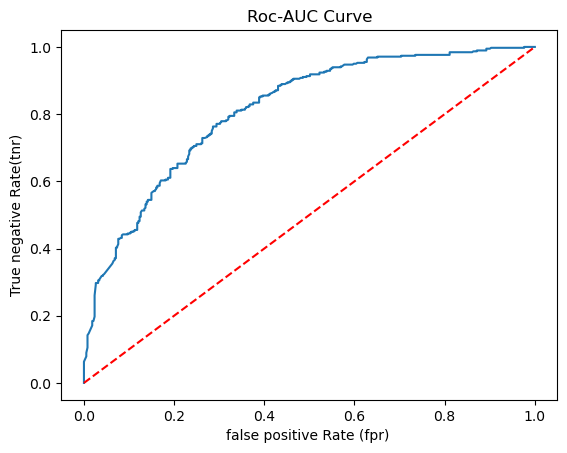

In [89]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('Roc-AUC Curve')
plt.xlabel('false positive Rate (fpr) ')
plt.ylabel('True negative Rate(tnr)')
plt.show()

In [90]:
roc_auc_score(y1_train,rfctrain_pred)

0.729268545379196

# predict for testing data and calculate the metrics

In [92]:
rfctest_pred=rfc_model.predict(X1_test)

In [93]:
confusion_matrix(y1_test,rfctest_pred)

array([[62, 33],
       [42, 54]], dtype=int64)

In [94]:
print(classification_report(y1_test,rfctest_pred))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62        95
           1       0.62      0.56      0.59        96

    accuracy                           0.61       191
   macro avg       0.61      0.61      0.61       191
weighted avg       0.61      0.61      0.61       191



# roc auc curve for training data

In [96]:
#the output probabilities
test_proba=rfc_model.predict_proba(X1_test)
test_proba

array([[0.62594142, 0.37405858],
       [0.53203904, 0.46796096],
       [0.27752946, 0.72247054],
       [0.5424881 , 0.4575119 ],
       [0.67668009, 0.32331991],
       [0.30452117, 0.69547883],
       [0.66477413, 0.33522587],
       [0.29460903, 0.70539097],
       [0.52622658, 0.47377342],
       [0.59576808, 0.40423192],
       [0.62496326, 0.37503674],
       [0.25115434, 0.74884566],
       [0.55324777, 0.44675223],
       [0.53814784, 0.46185216],
       [0.29460903, 0.70539097],
       [0.32647881, 0.67352119],
       [0.56004887, 0.43995113],
       [0.38704511, 0.61295489],
       [0.66893048, 0.33106952],
       [0.27159108, 0.72840892],
       [0.30461462, 0.69538538],
       [0.56269302, 0.43730698],
       [0.55396691, 0.44603309],
       [0.38561486, 0.61438514],
       [0.71500204, 0.28499796],
       [0.57893648, 0.42106352],
       [0.29460903, 0.70539097],
       [0.46611918, 0.53388082],
       [0.65720707, 0.34279293],
       [0.68469068, 0.31530932],
       [0.

In [97]:
test_proba[:,1]

array([0.37405858, 0.46796096, 0.72247054, 0.4575119 , 0.32331991,
       0.69547883, 0.33522587, 0.70539097, 0.47377342, 0.40423192,
       0.37503674, 0.74884566, 0.44675223, 0.46185216, 0.70539097,
       0.67352119, 0.43995113, 0.61295489, 0.33106952, 0.72840892,
       0.69538538, 0.43730698, 0.44603309, 0.61438514, 0.28499796,
       0.42106352, 0.70539097, 0.53388082, 0.34279293, 0.31530932,
       0.60232316, 0.76839097, 0.44438994, 0.37108865, 0.67092196,
       0.67583733, 0.55486   , 0.58919404, 0.60526378, 0.40017149,
       0.38895223, 0.37922698, 0.76839097, 0.55460754, 0.2906514 ,
       0.44024344, 0.38307737, 0.24591924, 0.27673664, 0.36810374,
       0.52189821, 0.41716301, 0.32572757, 0.32248018, 0.74451726,
       0.66865528, 0.2895957 , 0.50070917, 0.5475911 , 0.43176499,
       0.7641274 , 0.69712429, 0.68041428, 0.51237299, 0.23676361,
       0.53983754, 0.55168713, 0.7197151 , 0.67352119, 0.72840892,
       0.5376196 , 0.32396821, 0.37694805, 0.31494993, 0.75695

In [98]:
#false positive rate,true possitive rate,threshold 
fpr,tpr,thresh=roc_curve(y1_test,test_proba[:,1])


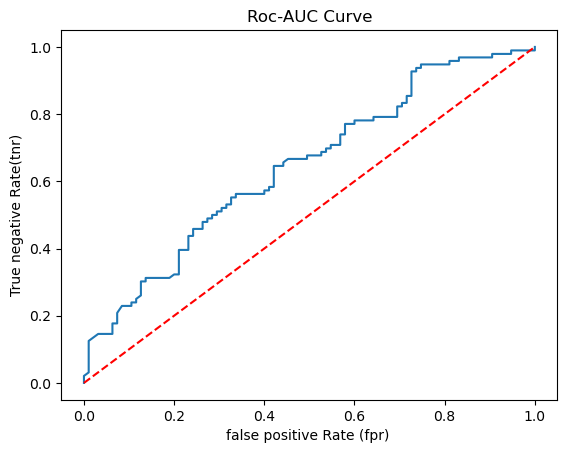

In [99]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('Roc-AUC Curve')
plt.xlabel('false positive Rate (fpr) ')
plt.ylabel('True negative Rate(tnr)')
plt.show()

In [100]:
roc_auc_score(y1_test,rfctest_pred)

0.6075657894736843

# visualize the fraud data

In [102]:
from sklearn.manifold import TSNE

In [103]:
vmodel=TSNE(n_components=2)

In [104]:
tsne_comps=vmodel.fit_transform(X1)
tsne_comps

array([[-48.930748 , -10.457928 ],
       [ 14.5054655,   6.834637 ],
       [ 36.53033  ,  -4.2563953],
       ...,
       [ -7.3420515,  -3.5595806],
       [ 19.158253 ,  17.383043 ],
       [ -9.488157 ,   3.8874483]], dtype=float32)

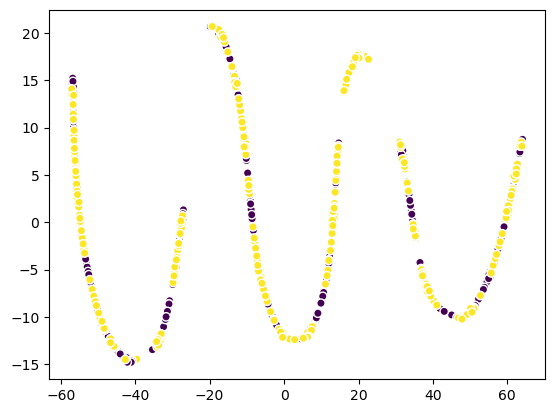

In [105]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y1,cmap='viridis',edgecolors='white')

In [106]:
fraud

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


# predict New data using Random forest

In [108]:
new_data=pd.DataFrame({'Undergrad':1,'Marital_Status':2,'City_Population':599600,'Work_Experience':15,'Urban':1},index=[1])
new_data

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
1,1,2,599600,15,1


In [109]:
rfc_model.predict(new_data)

array([0], dtype=int8)

# plot the regression tree

In [111]:
from sklearn.tree import plot_tree


In [112]:
fnames=fraud.columns
fnames

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban', 'Risk'],
      dtype='object')

In [113]:
cname=fraud['Risk'].unique()
cname

array([0, 1], dtype=int8)

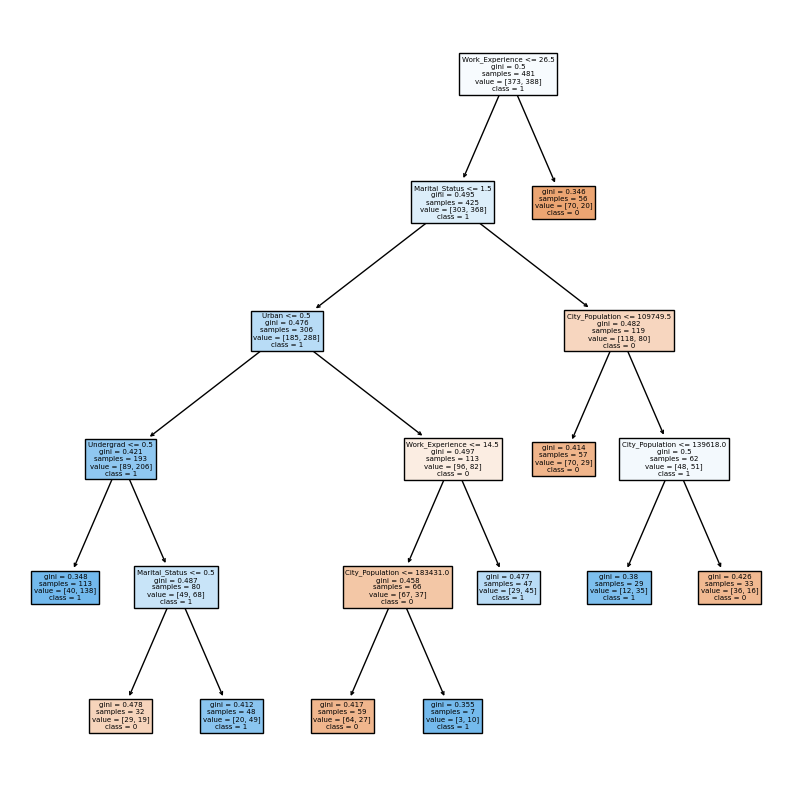

In [114]:
plt.figure(figsize=(10,10))
decision_tree = rfc_model.estimators_[0]
feature_names = fnames.tolist()
class_names = [str(label) for label in cname]
plot_tree(decision_tree,feature_names=feature_names,class_names=class_names,filled=True)
plt.show()